In [1]:
%matplotlib inline


============================
Circles, Wedges and Polygons
============================

This example demonstrates how to use patch collections.



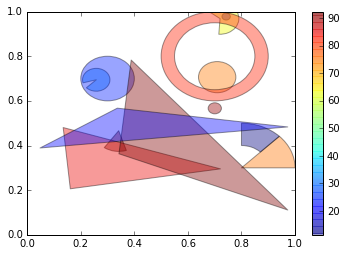

In [2]:
import numpy as np
import matplotlib
from matplotlib.patches import Circle, Wedge, Polygon
from matplotlib.collections import PatchCollection
import matplotlib.pyplot as plt

# Fixing random state for reproducibility
np.random.seed(19680801)


fig, ax = plt.subplots()

resolution = 50  # the number of vertices
N = 3
x = np.random.rand(N)
y = np.random.rand(N)
radii = 0.1*np.random.rand(N)
patches = []
for x1, y1, r in zip(x, y, radii):
    circle = Circle((x1, y1), r)
    patches.append(circle)

x = np.random.rand(N)
y = np.random.rand(N)
radii = 0.1*np.random.rand(N)
theta1 = 360.0*np.random.rand(N)
theta2 = 360.0*np.random.rand(N)
for x1, y1, r, t1, t2 in zip(x, y, radii, theta1, theta2):
    wedge = Wedge((x1, y1), r, t1, t2)
    patches.append(wedge)

# Some limiting conditions on Wedge
patches += [
    Wedge((.3, .7), .1, 0, 360),             # Full circle
    Wedge((.7, .8), .2, 0, 360, width=0.05),  # Full ring
    Wedge((.8, .3), .2, 0, 45),              # Full sector
    Wedge((.8, .3), .2, 45, 90, width=0.10),  # Ring sector
]

for i in range(N):
    polygon = Polygon(np.random.rand(N, 2), True)
    patches.append(polygon)

colors = 100*np.random.rand(len(patches))
p = PatchCollection(patches, alpha=0.4)
p.set_array(np.array(colors))
ax.add_collection(p)
fig.colorbar(p, ax=ax)

plt.show()

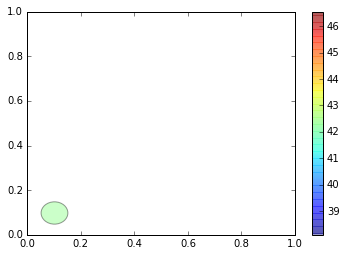

In [7]:
import numpy as np
import matplotlib
from matplotlib.patches import Circle, Wedge, Polygon
from matplotlib.collections import PatchCollection
import matplotlib.pyplot as plt
x1=0.1
y1=0.1
r=0.05
circle = Circle((x1, y1), r)
patches = []
patches.append(circle)

fig, ax = plt.subplots()

colors = 100*np.random.rand(len(patches))
p = PatchCollection(patches, alpha=0.4)
p.set_array(np.array(colors))
ax.add_collection(p)
fig.colorbar(p, ax=ax)

plt.show()

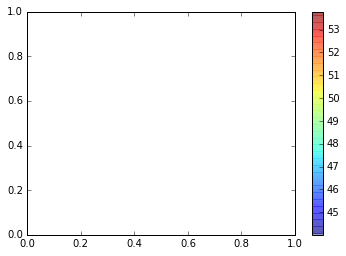

In [6]:
fig, ax = plt.subplots()
resolution=50
patches = []
circle = Circle((10, 20), 10)
patches.append(circle)

colors = 100*np.random.rand(len(patches))
p = PatchCollection(patches, alpha=0.4)

p.set_array(np.array(colors))
ax.add_collection(p)

fig.colorbar(p, ax=ax)

plt.show()

In [11]:
def cmap_xmap(function, cmap):
    """ Applies function, on the indices of colormap cmap. Beware, function
    should map the [0, 1] segment to itself, or you are in for surprises.

    See also cmap_xmap.
    """
    cdict = cmap._segmentdata
    function_to_map = lambda x : (function(x[0]), x[1], x[2])
    for key in ('red','green','blue'):
        cdict[key] = map(function_to_map, cdict[key])
        cdict[key].sort()
        assert (cdict[key][0]<0 or cdict[key][-1]>1), "Resulting indices extend out of the [0, 1] segment."

    return matplotlib.colors.LinearSegmentedColormap('colormap',cdict,1024)

dark_jet = cmap_map(lambda x: x*0.75, matplotlib.cm.jet)

x, y = np.mgrid[1:2, 1:10:0.01]
plt.figure(figsize=[15, 1])
plt.imshow(y, cmap=dark_jet, aspect='auto')
plt.axis('off')
plt.show()

NameError: name 'cmap_map' is not defined